##  **Some Helper Function:**

### Softmax Function:

In [ ]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       - m is the number of samples.
                       - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """

    # Subtract max value per row for numerical stability
    z_stable = z - np.max(z, axis=1, keepdims=True)

    # Compute exponentials
    exp_z = np.exp(z_stable)

    # Compute softmax probabilities
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_probs


### Softmax Test Case:

This test case checks that each row in the resulting softmax probabilities sums to 1, which is the fundamental property of softmax.

In [ ]:
# Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


### Prediction Function:

In [ ]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """

    logits = np.dot(X, W) + b

    probabilities = softmax(logits)

    # Predict the class with the highest probability
    predicted_classes = np.argmax(probabilities, axis=1)

    return predicted_classes


### Test Function for Prediction Function:
The test function ensures that the predicted class labels have the same number of elements as the input samples, verifying that the model produces a valid output shape.

In [ ]:
# Define test case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Expected Output:
# The function should return an array with class labels (0, 1, or 2)

y_pred_test = predict_softmax(X_test, W_test, b_test)

# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"

# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


### Loss Function:

In [ ]:
import numpy as np

def loss_softmax(y_pred, y):
    """
    Compute the cross-entropy loss for a single sample.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,) for a single sample,
                             where c is the number of classes.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (c,), where c is the number of classes.

    Returns:
    float: Cross-entropy loss for the given sample.
    """

    # Add a small epsilon to prevent log(0) issues (numerical stability)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)

    # Compute cross-entropy loss
    loss = -np.sum(y * np.log(y_pred))

    return loss


## Test case for Loss Function:
This test case Compares loss for correct vs. incorrect predictions.
*   Expects low loss for correct predictions.
*   Expects high loss for incorrect predictions.

In [ ]:
import numpy as np

# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])  # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Highly confident in the wrong class
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

# Validate that incorrect predictions lead to a higher loss
assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.4304
Cross-Entropy Loss (Incorrect Predictions): 8.9872


### Cost Function:

In [ ]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """

    # Compute logits: z = XW + b
    logits = np.dot(X, W) + b

    # Compute softmax probabilities
    probabilities = softmax(logits)

    # Add a small epsilon for numerical stability
    epsilon = 1e-12
    probabilities = np.clip(probabilities, epsilon, 1.0 - epsilon)

    # Compute cross-entropy loss for all samples
    total_loss = -np.sum(y * np.log(probabilities))

    # Compute number of samples
    n = X.shape[0]

    # Return average loss
    return total_loss / n


### Test Case for Cost Function:
The test case assures that the cost for the incorrect prediction should be higher than for the correct prediction, confirming that the cost function behaves as expected.

In [ ]:
import numpy as np

# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])  # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])  # Weights for correct prediction
b_correct = np.array([0.1, 0.1])  # Bias for correct prediction

# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])  # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])  # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6])  # Bias for incorrect prediction

# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)

# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)

print("Test passed!")


Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


### Computing Gradients:

In [ ]:
import numpy as np

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """

    # Compute logits: z = XW + b
    logits = np.dot(X, W) + b

    # Compute softmax probabilities
    probabilities = softmax(logits)

    # Compute error term (difference between predicted and actual labels)
    error = probabilities - y

    # Compute gradients
    n = X.shape[0]
    grad_W = np.dot(X.T, error) / n
    grad_b = np.sum(error, axis=0) / n

    return grad_W, grad_b


### Test case for compute_gradient function:
The test checks if the gradients from the function are close enough to the manually computed gradients using np.allclose, which accounts for potential floating-point discrepancies.

In [ ]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)

print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


### Implementing Gradient Descent:

In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and biases using gradient descent
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute and store cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Display cost at intervals
        if show_cost and i % (n_iter // 10) == 0:
            print(f"Iteration {i}/{n_iter}, Cost: {cost:.4f}")

    return W, b, cost_history


## Preparing Dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str)       : Path to the CSV file containing MNIST data.
    test_size (float)    : Proportion of the data to use as the test set (default: 0.2).
    random_state (int)   : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """

    # Load dataset
    df = pd.read_csv(csv_file)

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """

    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


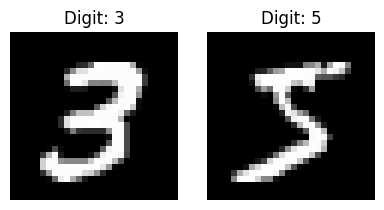

In [ ]:
csv_file_path = "/mnist_3_and_5.csv"  # Path to saved dataset
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

### **A Quick debugging Step:**

In [ ]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


## **Train the Model:**

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (2192, 784)
Test data shape: (549, 784)


Iteration 0/1000, Cost: 0.5840
Iteration 100/1000, Cost: 0.1458
Iteration 200/1000, Cost: 0.1208
Iteration 300/1000, Cost: 0.1092
Iteration 400/1000, Cost: 0.1019
Iteration 500/1000, Cost: 0.0968
Iteration 600/1000, Cost: 0.0927
Iteration 700/1000, Cost: 0.0895
Iteration 800/1000, Cost: 0.0867
Iteration 900/1000, Cost: 0.0844


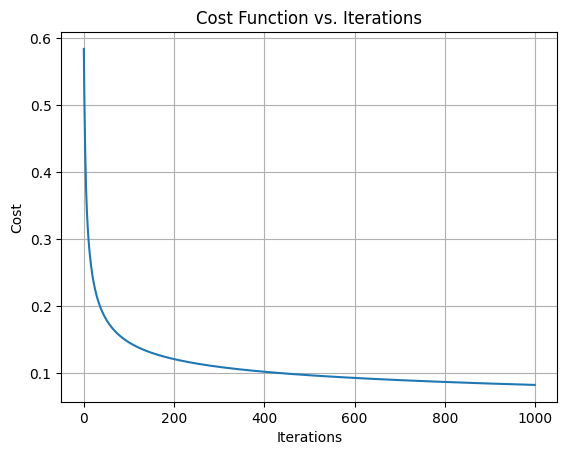

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


## **Evaluating the Model:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1



Confusion Matrix:
[[271   7]
 [ 24 247]]
Precision: 0.95
Recall: 0.94
F1-Score: 0.94


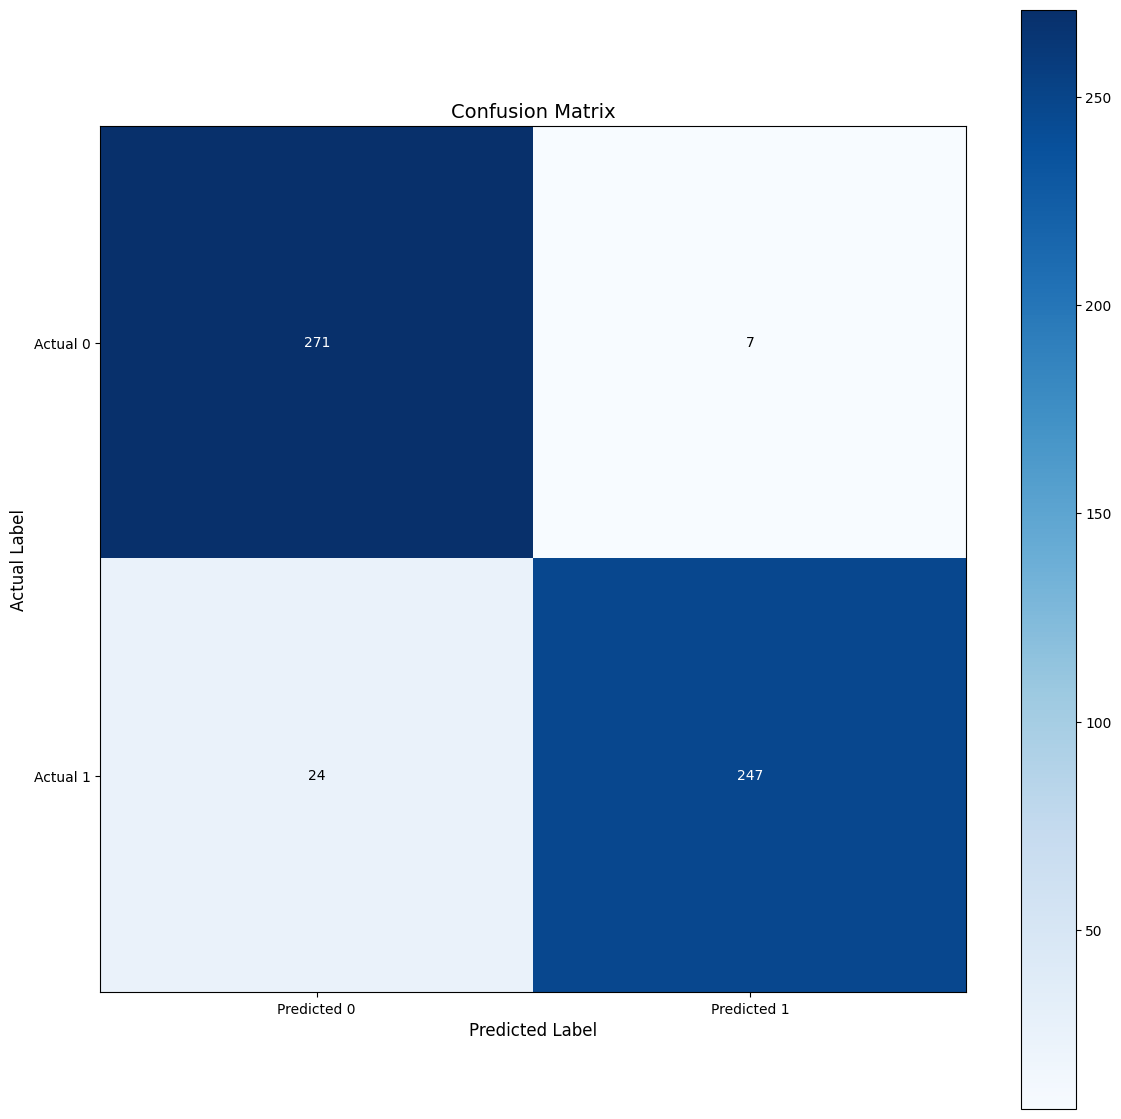

In [ ]:
# Predict on the test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate accuracy
y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Dynamic number of classes
num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.colorbar(cax)
plt.show()


# Linear Seperability and Logistic Regression:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

#Question 3: What does the weights array represent in this context?

The weights array represents the importance (or contribution) of each pixel in the 784-dimensional input image (since each image in MNIST is 28×28 pixels flattened into a 1D array of size 784).

Each weight corresponds to a specific pixel in the input image.

During training, these weights are updated based on how well the model predicts the labels (3 or 5).

The final weight values determine which pixels are most influential in distinguishing between 3s and 5s.

#Question 4: Why are we initializing the weights to zero? What effect could this have on the training process?

We initialize the weights to zero for simplicity, but this can have certain effects:

Why initialize to zero?
It provides a neutral starting point, meaning all pixels contribute equally at the beginning.

Since the Perceptron algorithm updates weights iteratively, starting from zero allows for gradual learning.

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
ax.imshow(X[idx].reshape(28, 28), cmap="gray")
ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
ax.axis("off")
plt.suptitle("Misclassified Images")
plt.show()
else:
print("All images were correctly classified!")

#Question 8: What does misclassified_idx store, and how is it used in this code?
The variable misclassified_idx stores the indices of incorrectly classified images.

How it works:
y_pred != y creates a Boolean mask (array of True/False values), where True represents misclassified samples.

np.where(y_pred != y)[0] extracts the indices of those misclassified samples.

How it's used in the code:
If there are misclassified samples, the code plots up to 10 of them using matplotlib.

It displays each misclassified image with its predicted (Pred) and true (True) label.

If no misclassifications exist, the message "All images were correctly classified!" is printed.

#Question 9: How do you interpret the result if the output is "All images were correctly classified!"?
If the message "All images were correctly classified!" appears, it means:
 The perceptron achieved 100% accuracy on the dataset.
 Every digit (3 or 5) in the dataset was correctly classified.

However, in real-world scenarios:

Perfect accuracy is rare, especially for handwritten digits.

Overfitting might have occurred if the dataset is too small or too simple.

#Question 5: What is the purpose of output = np.dot(X[i], weights) + bias line?
This line calculates the weighted sum (linear combination) of the input features (X[i]) using the weights and bias.

Breaking it down:
X[i] represents a single input sample (a flattened 28x28 image in MNIST).

weights is a vector that contains the learned importance of each pixel.

np.dot(X[i], weights) computes the sum of pixel values weighted by their corresponding weights.

bias is an additional value that shifts the decision boundary.

This output determines the raw prediction before applying an activation function (such as a step function). If output >= 0, the perceptron predicts class 1; otherwise, it predicts class 0.

#Question 6: What happens when the prediction is wrong? How are the weights and bias updated?
When the prediction is incorrect, the perceptron updates the weights and bias to correct future predictions using the Perceptron Learning Rule:

Update Rule:
\text{weights} = \text{weights} + \text{learning_rate} \times (\text{true label} - \text{predicted label}) \times \text{input features} \text{bias} = \text{bias} + \text{learning_rate} \times (\text{true label} - \text{predicted label})
How it works:
If the prediction is too low (y_pred = 0 but y_true = 1), increase weights to make future predictions higher.

If the prediction is too high (y_pred = 1 but y_true = 0), decrease weights to reduce the output.

This ensures the perceptron gradually learns the correct decision boundary.

#Question 7: Why is the final accuracy important, and what do you expect it to be?
The final accuracy measures the model’s performance by calculating the percentage of correct predictions.

Why is it important?
It quantifies learning progress, showing whether the perceptron is successfully distinguishing between 3s and 5s.

It helps compare models (e.g., adjusting learning rate or training for more epochs).

If accuracy is too low, it suggests issues like:

Not enough training data

Overlapping patterns between 3s and 5s

Need for more advanced models (e.g., SVMs, Neural Networks)

Expected Accuracy:
A simple perceptron should achieve 85-95% accuracy since 3s and 5s are somewhat distinct but can still be misclassified.

If accuracy is below 80%, adjustments might be needed (e.g., tuning hyperparameters).

#4.4 Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data(csv_path):
    """
    Load MNIST 3 vs 5 dataset and preprocess it.

    Args:
        csv_path (str): Path to the CSV file.

    Returns:
        X (np.array): Normalized feature matrix.
        y (np.array): Binary labels (-1 for 3, 1 for 5).
    """
    data = pd.read_csv('/mnist_3_and_5.csv')
    # Extract features and normalize
    X = data.drop('label', axis=1).values / 255.0
    # Convert labels: 3 → -1, 5 → 1
    y = data['label'].values
    y = np.where(y == 3, -1, 1)
    return X, y


In [ ]:

# Perceptron training function
def train_perceptron(X_train, y_train, learning_rate=0.1, epochs=100):
    """
    Train the Perceptron model.

    Args:
        X_train (np.array): Training features.
        y_train (np.array): Training labels.
        learning_rate (float): Step size for weight updates.
        epochs (int): Number of training passes.

    Returns:
        weights (np.array): Learned weights.
        bias (float): Learned bias term.
    """
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0.0

    for epoch in range(epochs):
        for i in range(n_samples):
            xi = X_train[i]
            yi = y_train[i]
            # Compute prediction
            prediction = np.dot(xi, weights) + bias
            # Update weights if misclassified
            if yi * prediction <= 0:
                weights += learning_rate * yi * xi
                bias += learning_rate * yi
        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} completed")
    return weights, bias


In [ ]:

# Prediction function
def predict_perceptron(X, weights, bias):
    """
    Predict labels using the Perceptron model.

    Args:
        X (np.array): Input features.
        weights (np.array): Model weights.
        bias (float): Bias term.

    Returns:
        predictions (np.array): Predicted labels (-1 or 1).
    """
    linear_output = np.dot(X, weights) + bias
    return np.sign(linear_output)


Epoch 10/100 completed
Epoch 20/100 completed
Epoch 30/100 completed
Epoch 40/100 completed
Epoch 50/100 completed
Epoch 60/100 completed
Epoch 70/100 completed
Epoch 80/100 completed
Epoch 90/100 completed
Epoch 100/100 completed

Test Accuracy: 93.62%


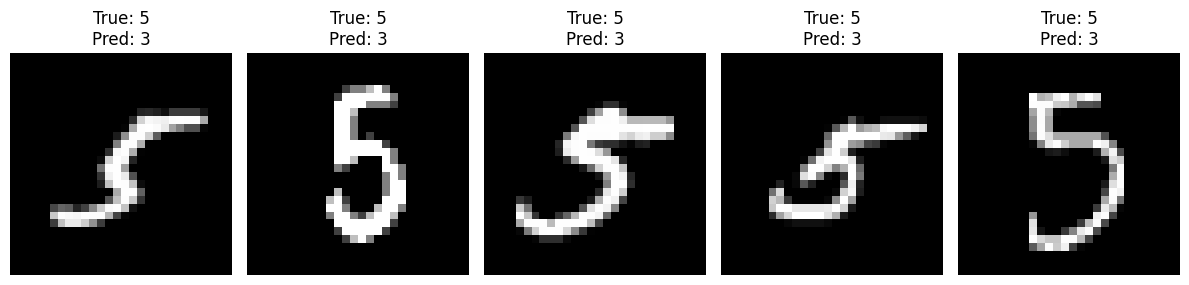

In [ ]:

# Visualize misclassified images
def plot_misclassified(X_test, y_test, y_pred, num_images=5):
    """
    Plot misclassified images with true/predicted labels.

    Args:
        X_test (np.array): Test features.
        y_test (np.array): True labels.
        y_pred (np.array): Predicted labels.
        num_images (int): Number of images to display.
    """
    misclassified = np.where(y_pred != y_test)[0]
    if len(misclassified) == 0:
        print("No misclassified images found!")
        return

    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(misclassified[:num_images]):
        plt.subplot(1, num_images, i + 1)
        image = X_test[idx].reshape(28, 28)
        true_label = 3 if y_test[idx] == -1 else 5
        pred_label = 3 if y_pred[idx] == -1 else 5
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load data
    X, y = load_data("mnist_3_and_5.csv")

    # Split into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train Perceptron
    weights, bias = train_perceptron(X_train, y_train, epochs=100)

    # Evaluate on test set
    y_pred = predict_perceptron(X_test, weights, bias)
    accuracy = np.mean(y_pred == y_test)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

    # Visualize misclassified images
    plot_misclassified(X_test, y_test, y_pred)